# 다중 분류(Multiclass Classification)
### 이미지 분류(**완전 연결층**)
---
- 데이터 셋: fashion_mnist
  - 흑백 이미지: 28, 28, 1

### 필요한 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### 데이터 준비
**Labels**

|Label|Description|
|:---:|:---:|
|0|T-shirt/top|
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag|
|9|Ankle boot|

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

- 이미지, 라벨 시각화

In [ ]:
samples = np.random.randint(60000, size=9)
samples

array([18341, 10391, 43232, 24585, 14989, 16469, 32763, 36443, 11894])

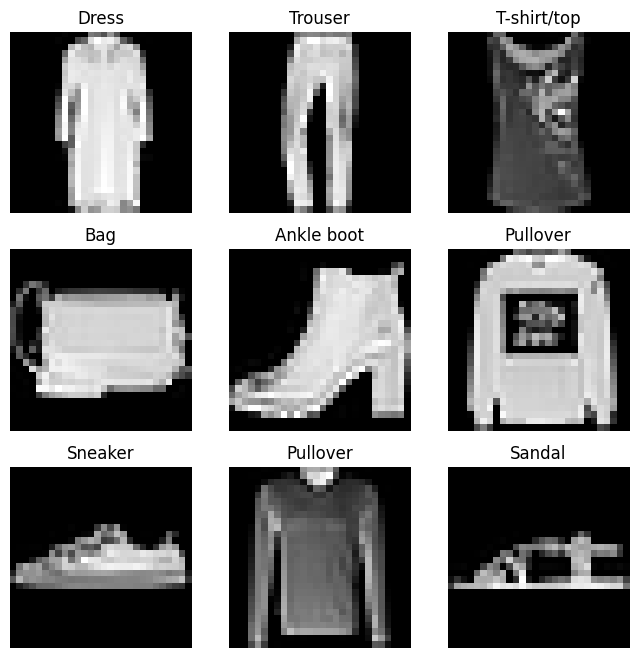

In [ ]:
plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis('off')
    plt.title(class_name[y_train[idx]])
plt.show()

- 데이터 분리: 학습 데이터, 검증 데이터

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.3,
                                                  random_state=1234)

print(X_train.shape, X_val.shape) 
print(y_train.shape, y_val.shape)

(42000, 28, 28) (18000, 28, 28)
(42000,) (18000,)


- 정규화: 최소-최대 정규화(Min-Max Scaler)

In [ ]:
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [ ]:
np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [ ]:
y_train[:10]

array([5, 0, 6, 5, 4, 8, 6, 7, 4, 6], dtype=uint8)

- 원-핫 인코딩(One-Hot Encoding)

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

In [ ]:
X_train.shape

(42000, 28, 28)

In [ ]:
X_train = X_train.reshape(-1, 28*28)
X_val = X_val.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [ ]:
X_train.shape

(42000, 784)

### 모델링(Modeling)

In [ ]:
model = keras.Sequential([
    layers.Dense(units=256, activation='relu', input_shape=(784,)), 
    layers.Dense(units=64, activation='relu'), 
    layers.Dense(units=32, activation='relu'), 
    layers.Dense(units=10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


### 컴파일(Compile)

In [ ]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['acc']
)

### 학습(Training)

In [ ]:
%%time
EPOCHS = 50
BATCH_SIZE = 32

history = model.fit(X_train, y_train_oh, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_data=(X_val, y_val_oh), 
                    verbose=1)

Epoch 1/50
1313/1313 [==============================] - 18s 9ms/step - loss: 0.5370 - acc: 0.8098 - val_loss: 0.4040 - val_acc: 0.8532
Epoch 2/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.3888 - acc: 0.8587 - val_loss: 0.3765 - val_acc: 0.8613
Epoch 3/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3495 - acc: 0.8730 - val_loss: 0.3863 - val_acc: 0.8631
Epoch 4/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3259 - acc: 0.8795 - val_loss: 0.3592 - val_acc: 0.8699
Epoch 5/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3047 - acc: 0.8874 - val_loss: 0.3400 - val_acc: 0.8758
Epoch 6/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.2899 - acc: 0.8922 - val_loss: 0.3332 - val_acc: 0.8785
Epoch 7/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2753 - acc: 0.8976 - val_loss: 0.3335 - val_acc: 0.8768
Epoch 8/50
1313/1313 [==============================] - 6s 5m

- 학습 과정 시각화

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

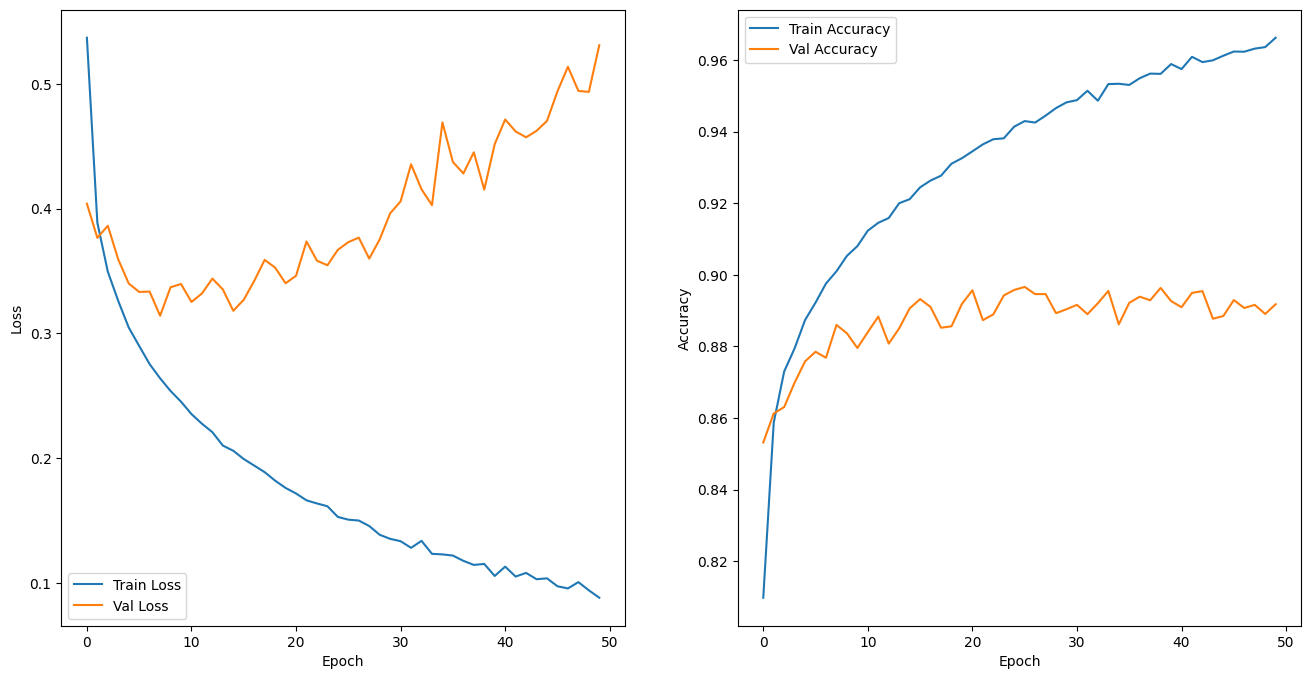

In [ ]:
plot_history(history)

### 평가(Evaluation)

In [ ]:
model.evaluate(X_train, y_train_oh)

1313/1313 [==============================] - 3s 2ms/step - loss: 0.0711 - acc: 0.9717


[0.07106122374534607, 0.9717142581939697]

In [ ]:
model.evaluate(X_test, y_test_oh)

313/313 [==============================] - 1s 2ms/step - loss: 0.6341 - acc: 0.8843


[0.6340810656547546, 0.8842999935150146]

### 예측(Prediction)

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.0934564e-07, 2.2367045e-07, 3.5679582e-10, 4.9725188e-08,
        9.7983079e-09, 2.7955713e-05, 2.1525393e-08, 5.8072032e-03,
        3.4618370e-06, 9.9416071e-01],
       [8.4521615e-13, 2.5603460e-15, 9.9997592e-01, 8.1735421e-13,
        2.4036481e-05, 4.0506395e-23, 2.7632155e-10, 1.4069741e-29,
        1.7302544e-18, 5.0112686e-23],
       [2.9082358e-38, 1.0000000e+00, 0.0000000e+00, 7.4458087e-32,
        3.4738947e-32, 0.0000000e+00, 5.2892506e-29, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.4959510e-36, 1.0000000e+00, 0.0000000e+00, 3.1308755e-28,
        4.5386367e-30, 0.0000000e+00, 6.5902771e-26, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.5233694e-04, 2.2428789e-23, 1.8662989e-07, 1.1547983e-10,
        1.6206299e-08, 1.6848193e-15, 9.9964750e-01, 3.2513396e-13,
        9.0879089e-13, 1.0366225e-14]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5]

array([9, 2, 1, 1, 6])

- 혼동 행렬(confusion matrix)

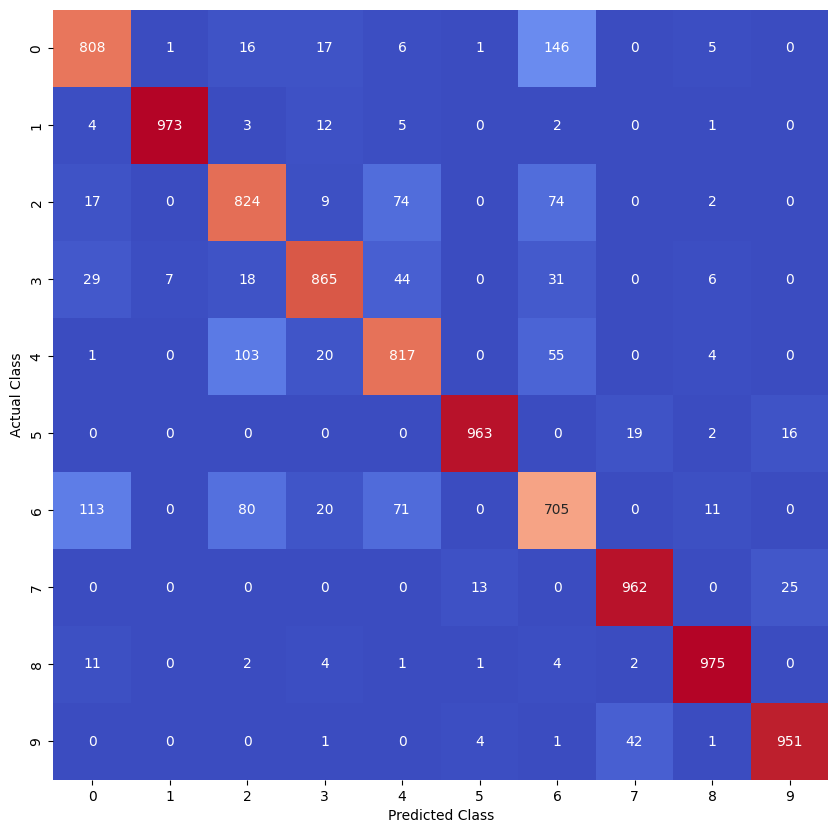

In [ ]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(cfm, annot=True, cbar=False, cmap='coolwarm', fmt='d')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

- 오답 이미지 시각화

In [ ]:
samples = np.where((y_test==y_pred) == False)[0]
samples = np.random.choice(samples, 9)
samples

array([7941, 1329, 1029, 6368, 2973,  888, 9979, 7134, 3655])

In [ ]:
X_test = X_test.reshape(-1, 28, 28)

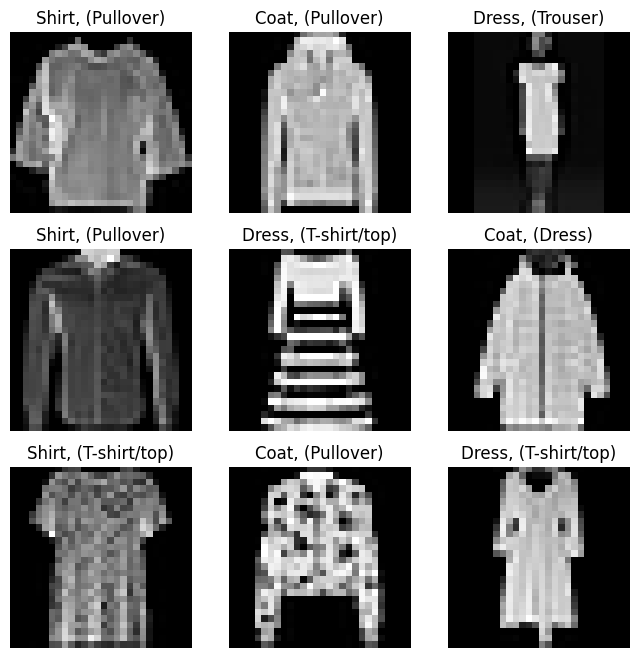

In [ ]:
plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.axis('off')
    plt.title(f'{class_name[y_test[idx]]}, ({class_name[y_pred[idx]]})')
plt.show()